#### Import du csv

In [62]:
# import des librairies dont nous aurons besoin
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy

# chargement et affichage des données
data = pd.read_csv('dataset.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Vérifier si les valeurs sont nulles

In [63]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [64]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Vérifications des  valeurs nuls en missingo ?

<AxesSubplot: >

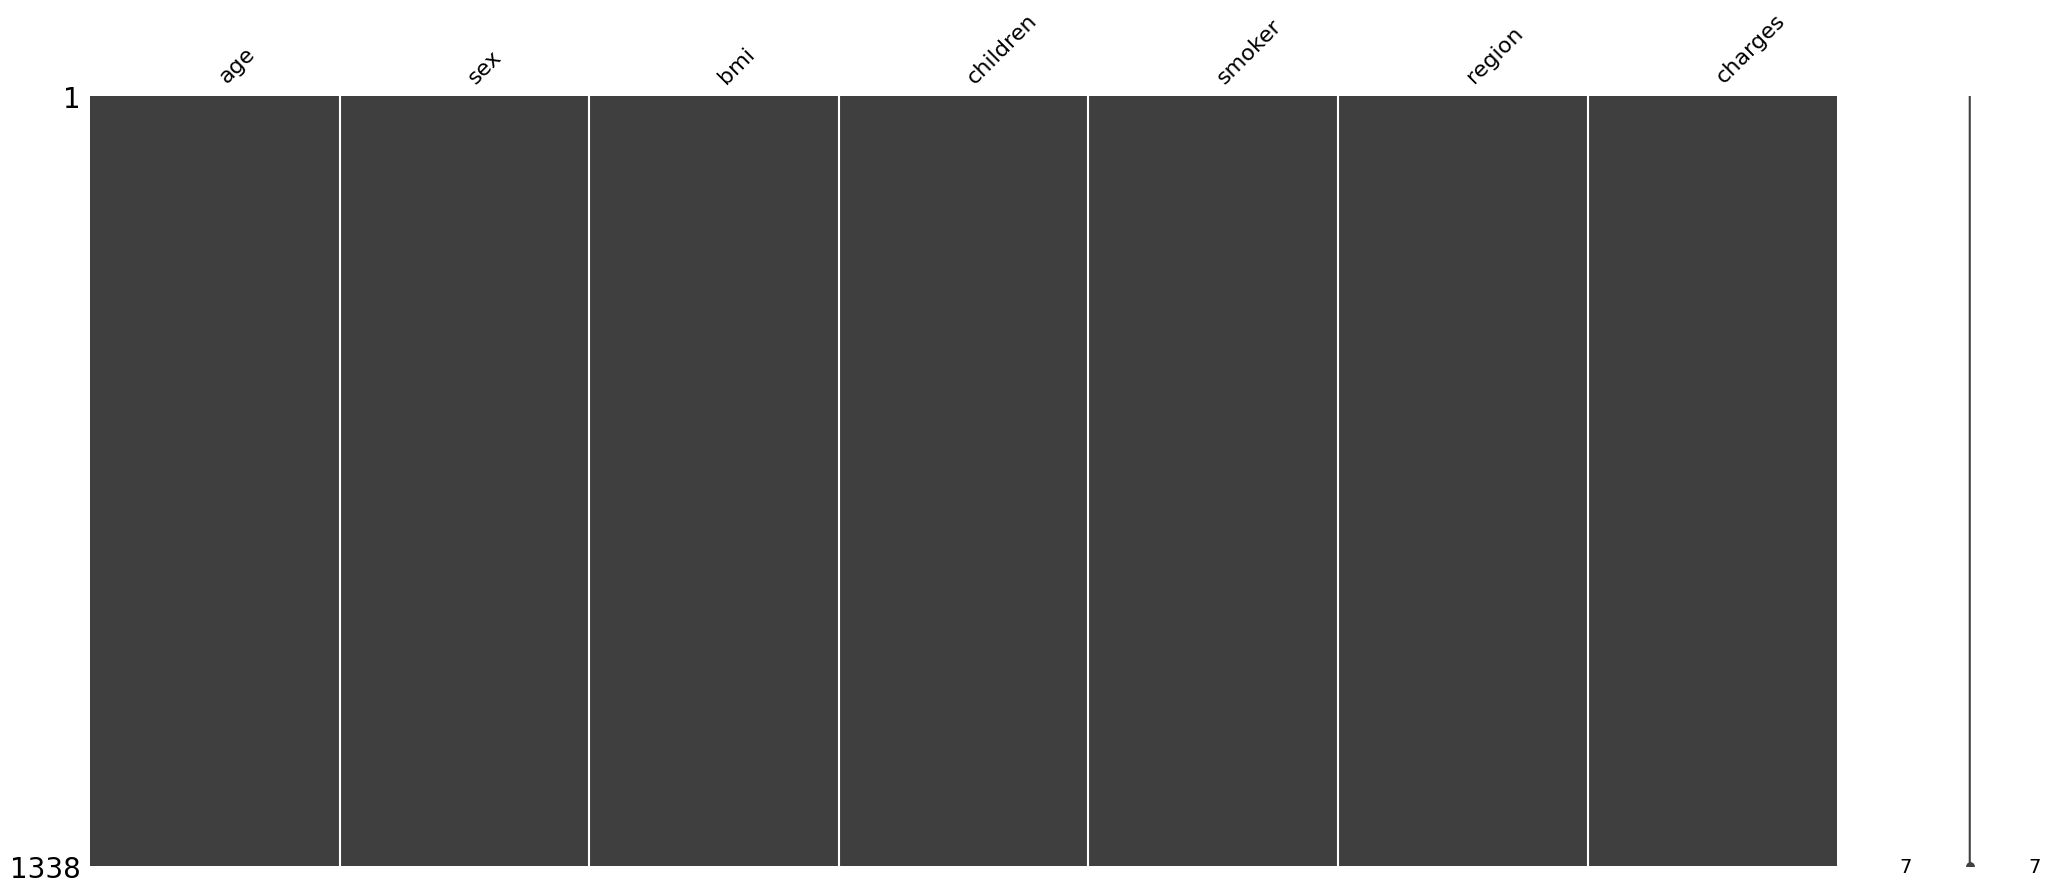

In [66]:
msno.matrix(data)

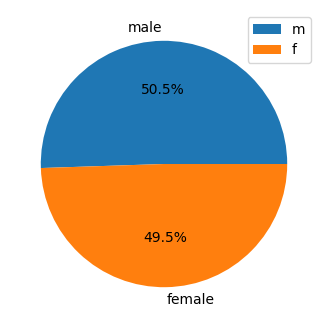

In [67]:
data['sex'].dtypes
x=data['sex'].value_counts()
plt.figure(figsize=(6,4))
plt.pie(x,labels=x.index,autopct='%.1f%%')
plt.legend('mf')

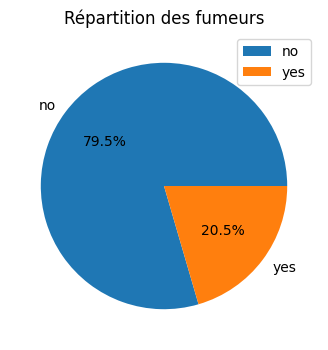

In [68]:
data['smoker']
y = data['smoker'].value_counts()
plt.figure(figsize=(6,4))
plt.pie(y,labels=y.index,autopct='%.1f%%')

plt.title('Répartition des fumeurs')
plt.legend()

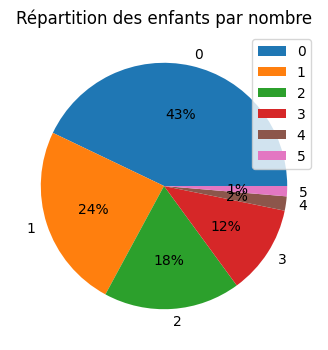

In [69]:
data['children']
s = data['children'].value_counts()
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b", "#e377c2"]
plt.figure(figsize=(6,4))
plt.pie(s, labels=s.index, colors=colors, autopct='%.0f%%')
plt.legend()

# Créer une légende avec des couleurs

plt.title('Répartition des enfants par nombre')
plt.show()

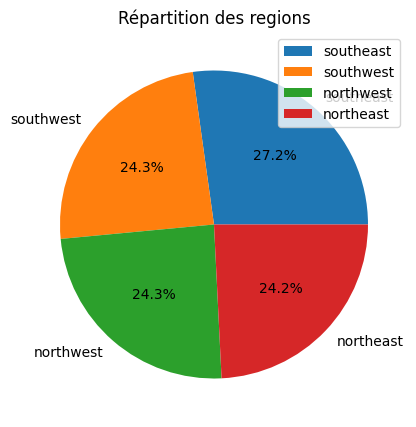

In [70]:
z = data['region'].value_counts()
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b", "#e377c2"]
plt.figure(figsize=(6,5))
plt.pie(z,labels=z.index, colors=colors, autopct='%.1f%%')
plt.title('Répartition des regions')
plt.legend()
plt.show()

#### Vérifier si il y'a des doublons et les supprimer 

In [71]:
data.loc[data.duplicated(keep=False),:]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [72]:
data.drop_duplicates(keep='first',inplace=True)

In [73]:
data.loc[data.duplicated(keep=False),:]

,age,sex,bmi,children,smoker,region,charges


#### représentation graphiques 

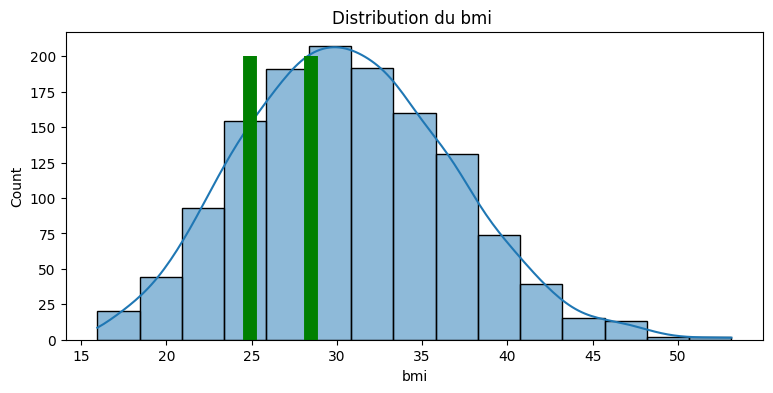

In [74]:

plt.figure(figsize=(9, 4))
sns.histplot(data['bmi'],kde=True, bins= 15)
plt.title("Distribution du bmi ")
plt.vlines(24.9, 0, 200, colors='green',linewidths= 10)
plt.vlines(28.5, 0, 200, colors='green',linewidths= 10)


Text(0.5, 1.0, 'Repartition des ages')

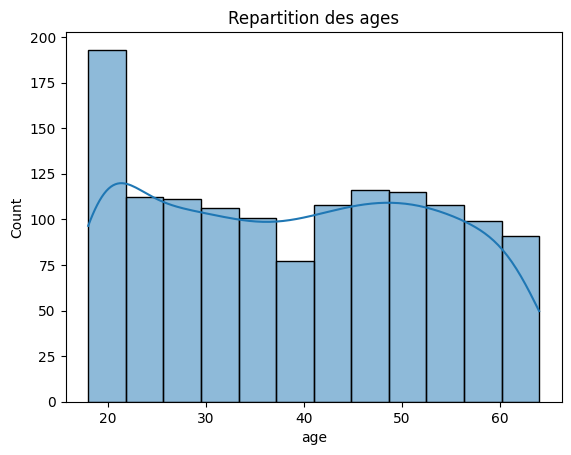

In [75]:
sns.histplot(data['age'],kde=True)
plt.title("Repartition des ages")

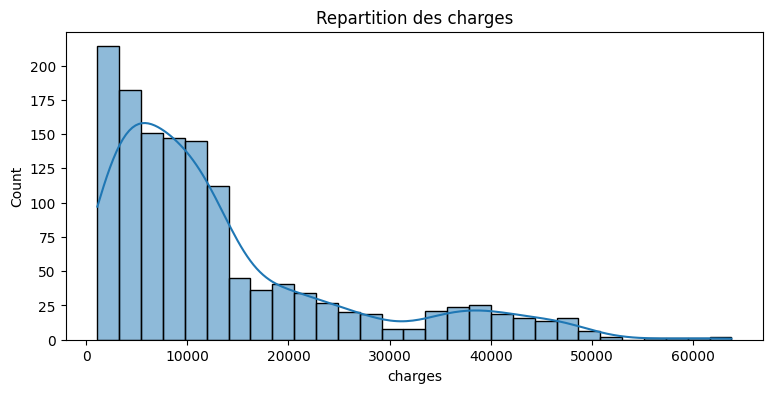

In [76]:
plt.figure(figsize=(9,4))
sns.histplot(data['charges'],kde=True)
plt.title("Repartition des charges")

plt.show()

In [77]:
correlation = data.corrwith(data.charges).sort_values(ascending= False ) 
correlation

/tmp/ipykernel_32980/3905918036.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corrwith(data.charges).sort_values(ascending= False )


charges     1.000000
age         0.298308
bmi         0.198401
children    0.067389
dtype: float64

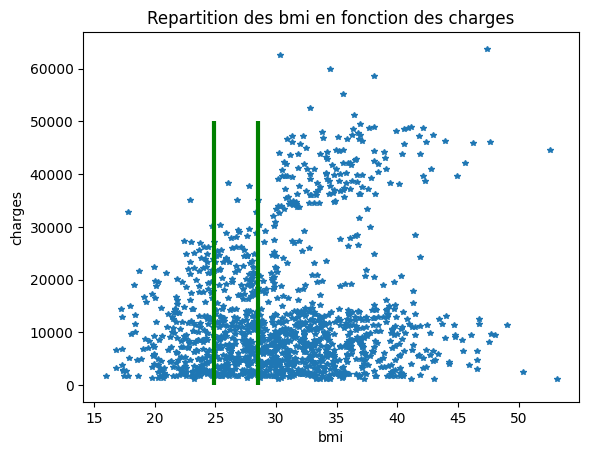

In [78]:
plt.plot(data["bmi"], data['charges'], '*', markersize=4) 
plt.vlines(24.9, 0, 50000, colors='green',linewidths= 3)
plt.vlines(28.5, 0, 50000, colors='green',linewidths= 3)
plt.title("Repartition des bmi en fonction des charges" )
plt.xlabel("bmi")
plt.ylabel('charges')
plt.show()


In [79]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


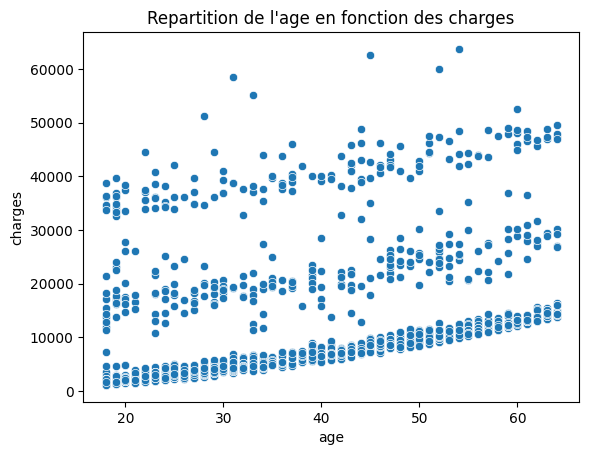

In [80]:
sns.scatterplot(x=data["age"], y=data['charges']) 
plt.title("Repartition de l'age en fonction des charges")
plt.xlabel("age")
plt.ylabel('charges')
plt.show()

charges / age


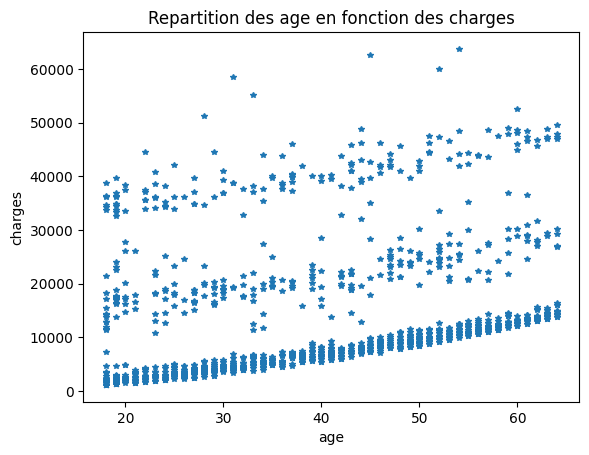

charges / sex


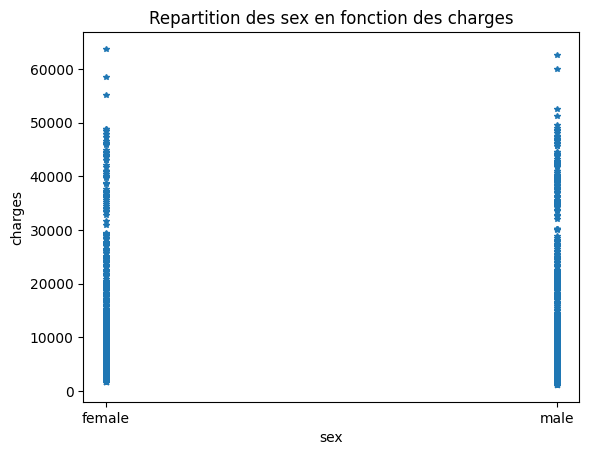

charges / bmi


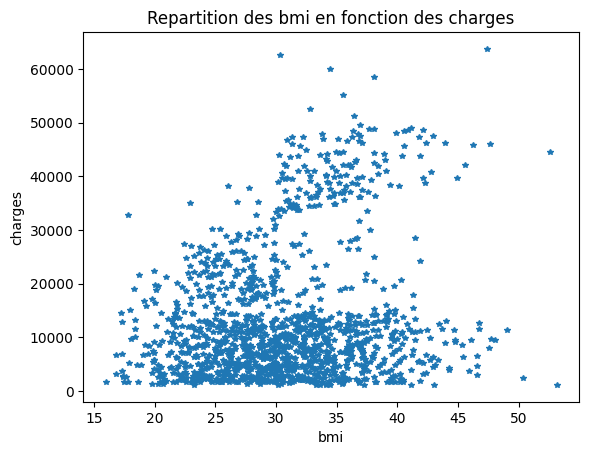

charges / children


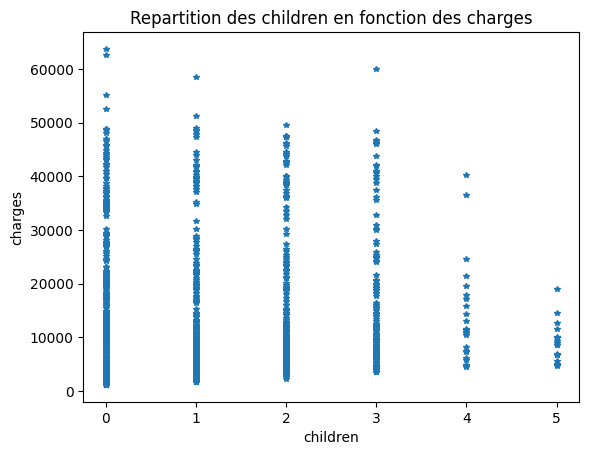

charges / smoker


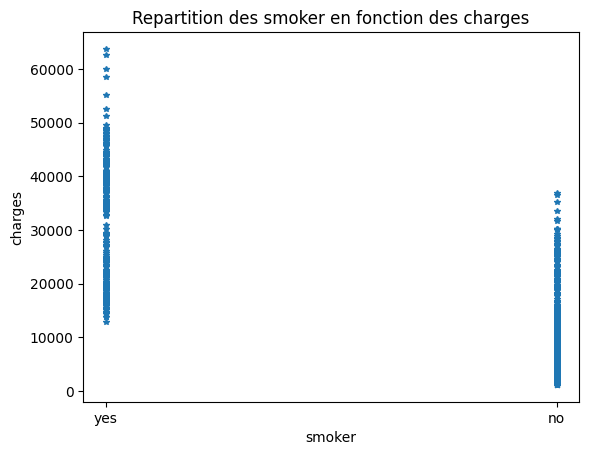

In [81]:
for index in data:
    if index in ["smoker", "age", "bmi", "children", "sex"]:
        print("charges / " + index)
        plt.plot(data[index], data['charges'], '*', markersize=4) 
        plt.title("Repartition des {} en fonction des charges".format(index) )
        plt.xlabel(index)
        plt.ylabel('charges')
        plt.show()


/tmp/ipykernel_32980/541255392.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  charges_moyennes = data.groupby('sex').mean()


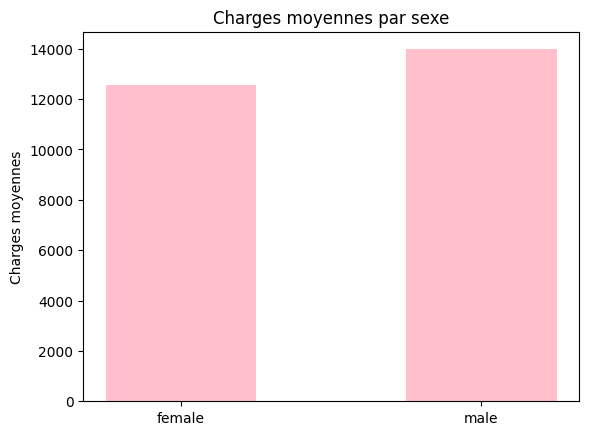

In [82]:

# Calculer les charges moyennes par sexe
charges_moyennes = data.groupby('sex').mean()

# Créer le diagramme à barres
plt.bar(charges_moyennes.index, charges_moyennes['charges'], width=0.5, color='pink')

# Ajouter un titre et des étiquettes de l'axe y
plt.title('Charges moyennes par sexe')
plt.ylabel('Charges moyennes')

# Afficher le diagramme
plt.show()

Text(0.5, 1.0, "Prime d'assurance selon l'âge et le statut de fumeur")

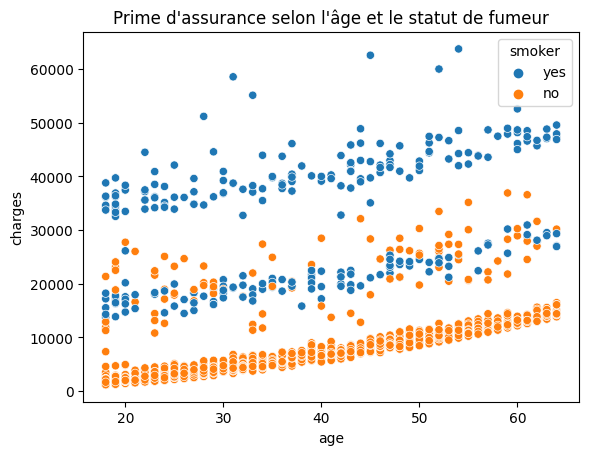

In [83]:
sns.scatterplot(x=data["age"], y= data["charges"], hue= data["smoker"])
plt.title("Prime d'assurance selon l'âge et le statut de fumeur")

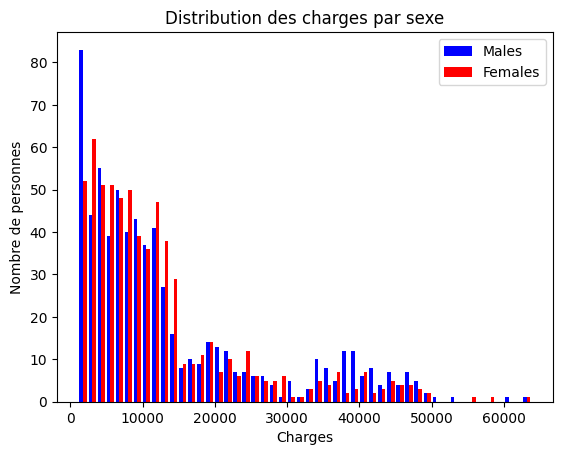

In [84]:
s = data['sex'].values
c = data['charges'].values
r = data['age'].values 

#on compte le nombre de male et female
males = s[s == 'male'].size
females = s[s == 'female'].size

#on construit un tableau qui contiendra les charges des male et des female
male_charges = c[s == 'male']
female_charges = c[s == 'female']

#on trace la distribution des charges des male et des female
plt.hist([male_charges, female_charges], bins=50, color=['blue', 'red'], 
         label=['Males', 'Females'])
plt.xlabel('Charges')
plt.ylabel('Nombre de personnes')
plt.title('Distribution des charges par sexe')
plt.legend()
plt.show()

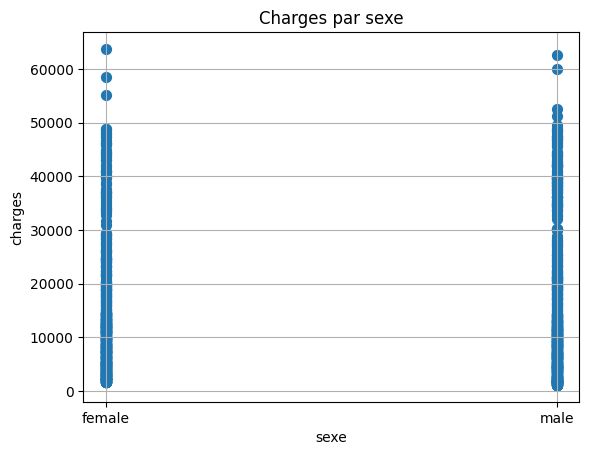

In [85]:
plt.scatter(data['sex'], data['charges'], marker='o', s=50 ) 
plt.title('Charges par sexe')
plt.xlabel('sexe')
plt.ylabel('charges')
plt.grid(True)

plt.show()

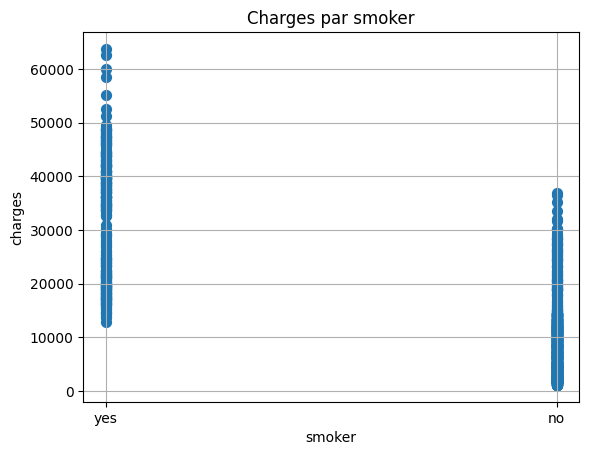

In [86]:
plt.scatter(data['smoker'], data['charges'], marker='o', s=50 ) 
plt.title('Charges par smoker')
plt.xlabel('smoker')
plt.ylabel('charges')
plt.grid(True)

plt.show()

/tmp/ipykernel_32980/2961537042.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  charges_moyennes = data.groupby('children').mean()


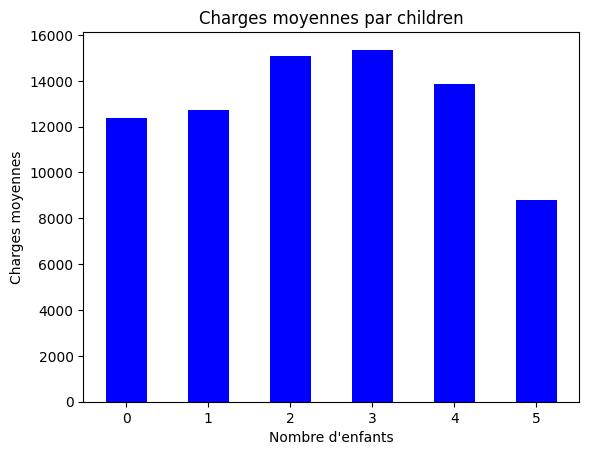

In [87]:

# Calculer les charges moyennes par sexe
charges_moyennes = data.groupby('children').mean()

# Créer le diagramme à barres
plt.bar(charges_moyennes.index, charges_moyennes['charges'], width=0.5, color='blue')

# Ajouter un titre et des étiquettes de l'axe y
plt.title('Charges moyennes par children')
plt.ylabel('Charges moyennes')
plt.xlabel("Nombre d'enfants")
# Afficher le diagramme
plt.show()

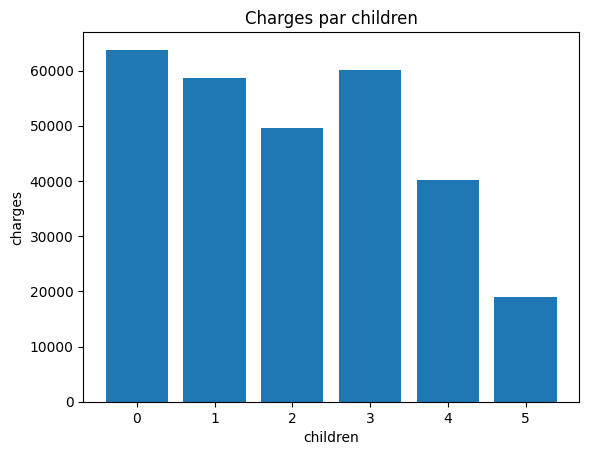

In [88]:
plt.title('Charges par children')
plt.bar(data['children'], data['charges']) 
plt.xlabel('children')
plt.ylabel('charges')
plt.show()

Text(0.5, 1.0, "Prime d'assurance selon le bmi et le statut de fumeur")

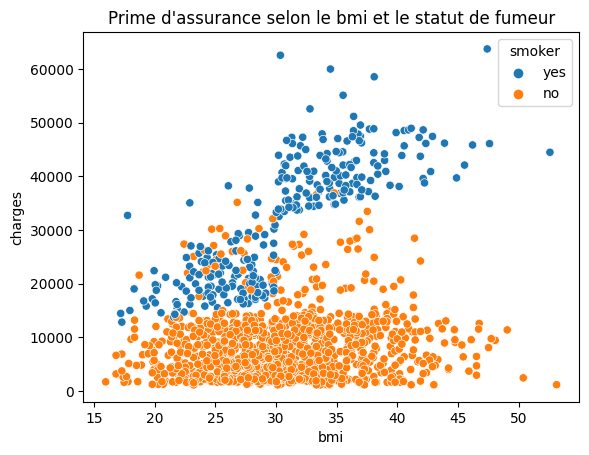

In [89]:
sns.scatterplot(x= data["bmi"], y = data["charges"], hue= data["smoker"])
plt.title("Prime d'assurance selon le bmi et le statut de fumeur")


Text(0.5, 1.0, "Prime d'assurance selon le bmi et le statut de fumeur")

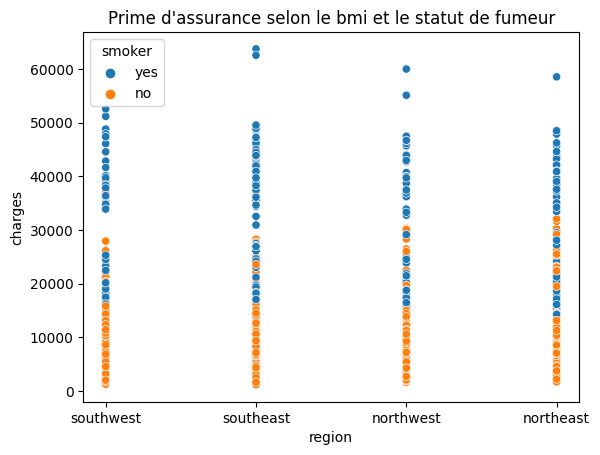

In [90]:
sns.scatterplot(x= data["region"], y = data["charges"], hue= data["smoker"])
plt.title("Prime d'assurance selon le bmi et le statut de fumeur")

Ce graphique montre la relation entre le BMI (Indice de Masse Corporelle) et les frais d'assurance médicale pour une population de fumeurs et non-fumeurs. On peut voir que les fumeurs ont des frais d'assurance médicale considérablement plus élevés que ceux des non-fumeurs, que ce soit pour les faibles ou les hauts BMI. Il est également intéressant de remarquer que pour les faibles et les moyens BMI, les frais d'assurance médicale des fumeurs sont plus élevés que ceux des non-fumeurs alors que pour les hauts BMI, les frais d'assurance médicale des fumeurs et des non-fumeurs sont relativement similaires.

<AxesSubplot: xlabel='sex', ylabel='charges'>

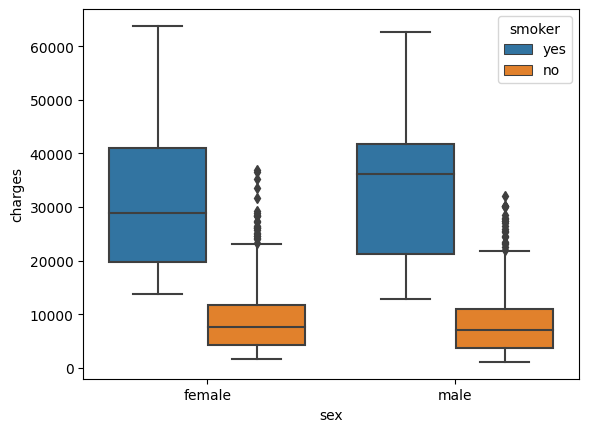

In [91]:
sns.boxplot(x= data["sex"], y = data["charges"], hue= data["smoker"])


Ce graphique représente la relation entre le sexe, le fait d'être fumeur et les coûts des soins de santé pour les individus. Il montre que les fumeurs ont généralement des coûts de soins de santé plus élevés que les non-fumeurs, et que les hommes ont généralement des coûts de soins de santé plus élevés que les femmes.

Text(0.5, 1.0, "Prime d'assurance selon le sex et le statut de fumeur")

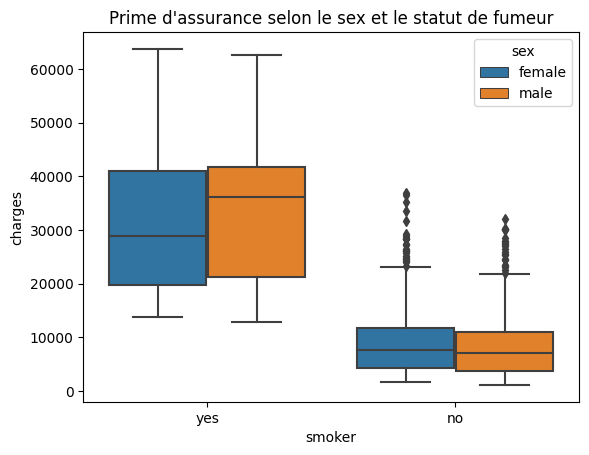

In [92]:
ax = sns.boxplot(x=data["smoker"], y=data["charges"], hue=data["sex"])
plt.title("Prime d'assurance selon le sex et le statut de fumeur")


Text(0.5, 1.0, "Prime d'assurance selon le sex et le statut de fumeur")

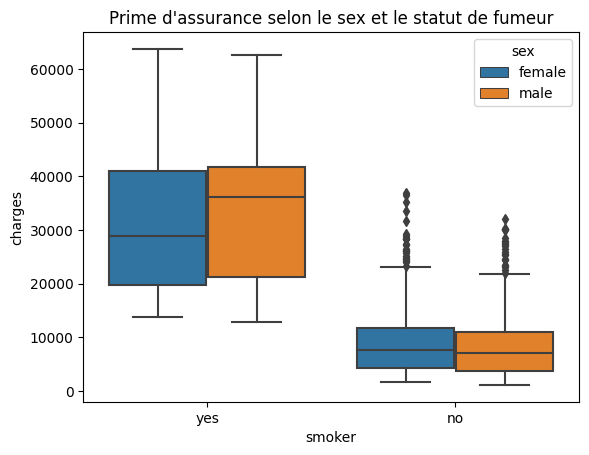

In [93]:
ax = sns.boxplot(x=data["smoker"], y=data["charges"], hue=data["sex"])
plt.title("Prime d'assurance selon le sex et le statut de fumeur")

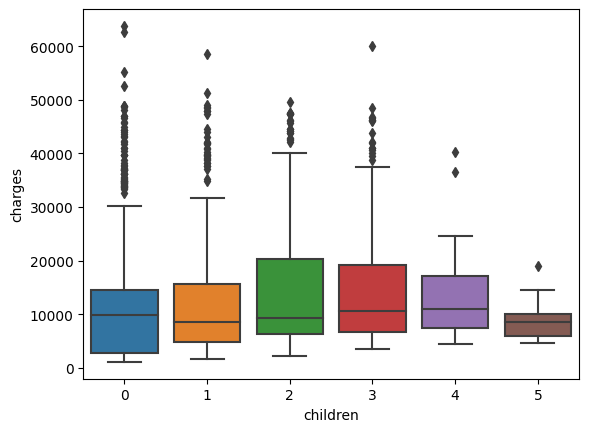

In [94]:
ax = sns.boxplot(x=data["children"], y=data["charges"])

In [95]:
#### Transformer les variables catégorielles en viariables binaires pour la colonne région 
data = pd.get_dummies(data, columns = ["region"])
data

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,0,1
1,18,male,33.770,1,no,1725.55230,0,0,1,0
2,28,male,33.000,3,no,4449.46200,0,0,1,0
3,33,male,22.705,0,no,21984.47061,0,1,0,0
4,32,male,28.880,0,no,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,0,1,0,0
1334,18,female,31.920,0,no,2205.98080,1,0,0,0
1335,18,female,36.850,0,no,1629.83350,0,0,1,0
1336,21,female,25.800,0,no,2007.94500,0,0,0,1


In [96]:
correlation = data.corrwith(data.charges).sort_values(ascending= False ) 
correlation

/tmp/ipykernel_32980/3905918036.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corrwith(data.charges).sort_values(ascending= False )


charges             1.000000
age                 0.298308
bmi                 0.198401
region_southeast    0.073578
children            0.067389
region_northeast    0.005945
region_northwest   -0.038695
region_southwest   -0.043637
dtype: float64

# Test statistique

spearmanr

In [97]:
cols_to_norm = ['age', 'bmi','children']
for col in cols_to_norm:
    corr , p_value = scipy.stats.spearmanr(data[col],data['charges'])
    print(f'Correlation de spearmanr for {col}: {corr}, p-value: {p_value}')


Correlation de spearmanr for age: 0.5335232787189862, p-value: 3.1877556503224748e-99
Correlation de spearmanr for bmi: 0.11958495819244366, p-value: 1.1637179203181515e-05
Correlation de spearmanr for children: 0.13220013322835855, p-value: 1.2303764274728685e-06


In [98]:
import seaborn as sns 

In [99]:
#data = data.drop(['region_northeast', 'region_northwest','region_southeast', 'region_southwest' ], axis = 1)

/tmp/ipykernel_32980/2702037488.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


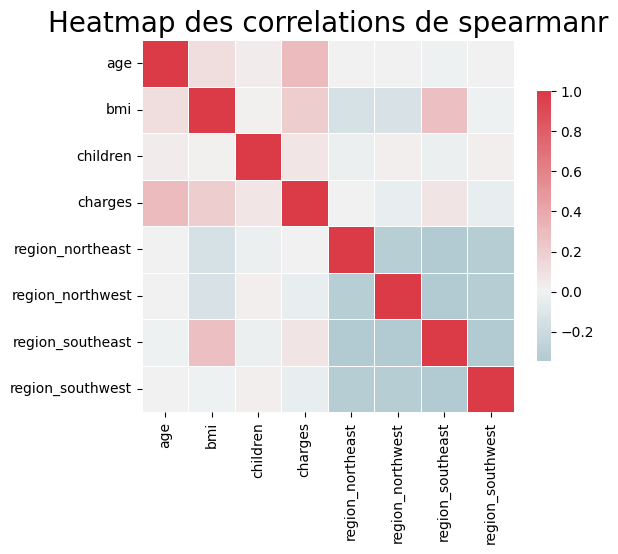

In [101]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Calculate correlation
corr = data.corr()

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Heatmap des correlations de spearmanr", fontsize=20)
plt.show()

In [102]:
import pandas as pd 

In [103]:
cross_tab = pd.crosstab(data['smoker'], data['bmi']) 
chi2, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)
chi2, p, dof, expected
df_cross_tab = pd.DataFrame(expected, index=cross_tab.index, columns=cross_tab.columns)
print(cross_tab)
#Tableau de contingences des valeurs théoriques
df_expected = pd.DataFrame(expected, index=cross_tab.index, columns=cross_tab.columns)
print("----------------------------------------")
print(df_expected)

bmi     15.960  16.815  17.195  17.290  17.385  17.400  17.480  17.670  \
smoker                                                                   
no           1       2       0       2       1       1       1       1   
yes          0       0       1       1       0       0       0       0   

bmi     17.765  17.800  ...  46.750  47.410  47.520  47.600  47.740  48.070  \
smoker                  ...                                                   
no           0       1  ...       1       0       1       0       1       1   
yes          1       0  ...       0       1       0       1       0       0   

bmi     49.060  50.380  52.580  53.130  
smoker                                  
no           1       1       0       1  
yes          0       0       1       0  

[2 rows x 548 columns]
----------------------------------------
bmi       15.960    16.815    17.195    17.290    17.385    17.400    17.480  \
smoker                                                                       